# Projeto 3 - Clusterização de dados de vendas de produtos
## Wholesale customers Data Set - UCI

## Introdução

O conjunto de dados de vendas esta localizado na plataforma UCI no seguinte link - https://archive.ics.uci.edu/ml/datasets/Wholesale+customers. Este é um conjunto de dados que não possui rotulo, o nosso desafio será agrupar essas vendas em grupos e avaliar estes grupos.

Segue a descrição das variaveis:
- FRESH: gastos anuais em produtos frescos
- MILK: gastos anuais em produtos lácteos
- GROCERY: gastos anuais em produtos de mercearia
- FROZEN: gastos anuais em produtos congelados
- DETERGENTS_PAPER: gastos anuais em detergentes e produtos de papel
- DELICATESSEN: gastos anuais em produtos artesanais (queijos, vinhos, doces)
- CHANNEL: origem do cliente - Horeca (Hotel/Restaurante/Café) (1) ou canais de varejo (2)
- REGION: região do cliente Lisbon (1), Oporto (2) or Other Region (3)

#### referencia: 
Abreu, N. (2011). Analise do perfil do cliente Recheio e desenvolvimento de um sistema promocional. Mestrado em Marketing, ISCTE-IUL, Lisbon

# Sobre este projeto

Neste projeto treine os conhecimentos aprendidos até o momento e que entenda algumas das dificuldades que pode ter quando for aplicar os mesmos. 

Os principais pontos que serão avaliados:

- Levantamento de hipoteses
- Manipulação de dados e criação de gráficos simples com o `Pandas`
- Criar um modelo clusterização e justificar

# Preparação do ambiente

- Acessem o link - https://archive.ics.uci.edu/ml/machine-learning-databases/00292/Wholesale%20customers%20data.csv e faça o download do conjunto de dados.

In [ ]:
!pip install scikit-learn-extra

     |████████████████████████████████| 1.7 MB 4.3 MB/s 


In [ ]:
# importando as bibliotecas necessárias:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

# bibliotecas para padronizar os dados e buscar pelas variaveis mais representativas
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE

#  preprocessamento e modelo K-Means
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# modelo Kmedoids
from sklearn_extra.cluster import KMedoids

# métricas
from sklearn.metrics import silhouette_score
from sklearn.metrics.cluster import adjusted_rand_score

Criando dois dataframes, o X para fazermos alguns testes e o SALE para manter original até o final do trabalho:

In [ ]:
sale = pd.read_csv('Wholesale customers data.csv')
X = pd.read_csv('Wholesale customers data.csv')

Vizualisando os dados:


In [ ]:
sale.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


Vendo o número de linhas e de colunas:

In [ ]:
sale.shape

(440, 8)

Analisando algumas informações importantes dos dados:

In [ ]:
sale.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


Podemos ver que todos os dados estão como "int" e não temos nenhum valor nulo presente em nossa base.

**Trabalhando com os dados:**
* Agora rodaremos um código para olhar mais de perto  os dados das colunas

In [ ]:
print("Formato:", sale.shape)
print("\n\n\n")
for coluna in sale.columns:
  print(coluna + ": ")
  print(sale[coluna].unique())
  print(sale[coluna].describe())
  display (sale[sale[coluna].isnull()])
  print("\n\n\n")

É interessante olhar dado a dado, ver todos os valores que cada variável contém e também ter um visão geral estatística delas, quantidade, média, desvio padrão, valor mínimo, 1º quartil, mediana, 3º quartil e valor máximo.

Olhando de perto as colunas "Channel" e "Região":

In [ ]:
sales1 = sale['Channel'].value_counts()
sales2 = sale['Region'].value_counts()


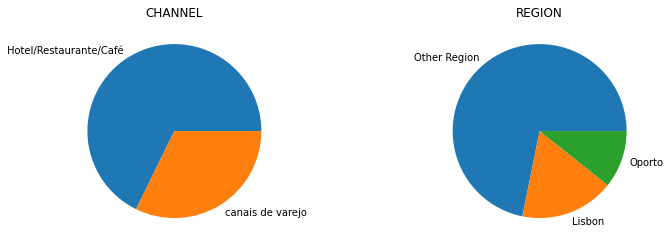

In [ ]:
plt.figure(figsize=(12,4))

plt.subplot(1, 2, 1) 
plt.pie(sales1 , labels = ['Hotel/Restaurante/Café','canais de varejo']) 
plt.title('CHANNEL', fontsize=12) 

plt.subplot(1, 2, 2) 
plt.pie(sales2 , labels = ['Other Region','Lisbon','Oporto'])  
plt.title('REGION', fontsize=12)
plt.show()  

Podemos notar que os valores não estão equilibrados, isso pode prejudicar o nosso modelo. No caso da variável CHANNEL temos muitos mais clientes de origem do (Hotel/Restaurante/Café) e no Caso da variável REGION, muito mais casos de outra região.

Para entender melhor como essas variáveis se relacionam, vamos plotar gráficos de dispersão entre elas:

Text(0.5, 1.0, 'FRESH X DELICASSEN')

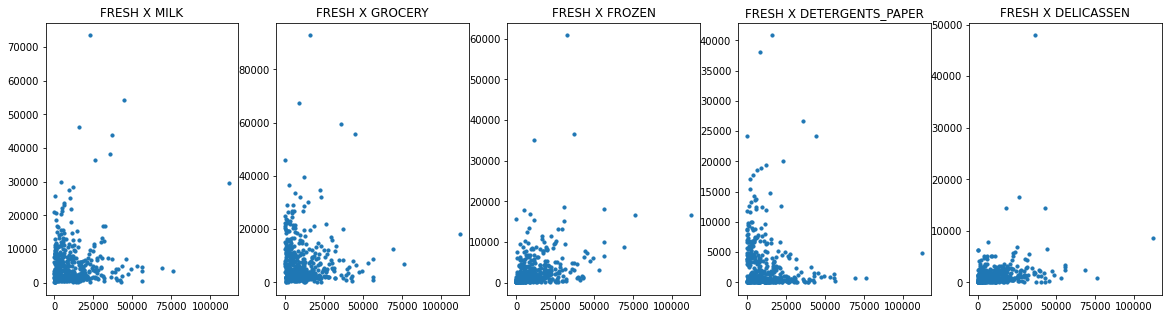

In [ ]:
plt.figure(figsize=(20,5))

plt.subplot(1, 5, 1) 
plt.scatter(sale.loc[:,'Fresh'], sale.loc[:,'Milk'],s=10)
plt.title('Fresh x milk'.upper(), fontsize=12) 

plt.subplot(1, 5, 2) 
plt.scatter(sale.loc[:,'Fresh'], sale.loc[:,'Grocery'],s=10)
plt.title('Fresh x Grocery'.upper(), fontsize=12)  

plt.subplot(1, 5, 3) 
plt.scatter(sale.loc[:,'Fresh'], sale.loc[:,'Frozen'],s=10)
plt.title('Fresh x Frozen'.upper(), fontsize=12) 

plt.subplot(1, 5, 4) 
plt.scatter(sale.loc[:,'Fresh'], sale.loc[:,'Detergents_Paper'],s=10)
plt.title('Fresh x Detergents_Paper'.upper(), fontsize=12)

plt.subplot(1, 5, 5) 
plt.scatter(sale.loc[:,'Fresh'], sale.loc[:,'Delicassen'],s=10)
plt.title('Fresh x Delicassen'.upper(), fontsize=12)

Temos pouca relação entre todos estes dados, o dois únicos que mostram ter uma ralação maior é entre FRESH e FROZEN.

Text(0.5, 1.0, 'MILK X DELICASSEN')

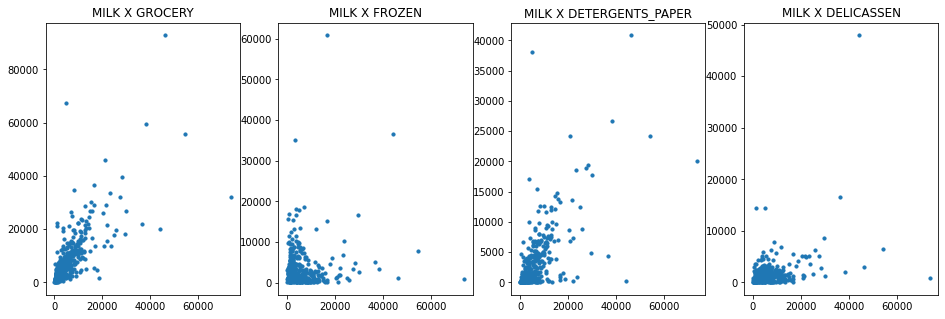

In [ ]:
plt.figure(figsize=(16,5))

plt.subplot(1, 4, 1) 
plt.scatter(sale.loc[:,'Milk'], sale.loc[:,'Grocery'],s=10)
plt.title('Milk x Grocery'.upper(), fontsize=12)  

plt.subplot(1, 4, 2) 
plt.scatter(sale.loc[:,'Milk'], sale.loc[:,'Frozen'],s=10)
plt.title('Milk x Frozen'.upper(), fontsize=12) 

plt.subplot(1, 4, 3) 
plt.scatter(sale.loc[:,'Milk'], sale.loc[:,'Detergents_Paper'],s=10)
plt.title('Milk x Detergents_Paper'.upper(), fontsize=12)

plt.subplot(1, 4, 4) 
plt.scatter(sale.loc[:,'Milk'], sale.loc[:,'Delicassen'],s=10)
plt.title('Milk x Delicassen'.upper(), fontsize=12)

Aqui já conseguimos ver que existe mais relações, entre MILK e GROCERY e entre MILK e DETERGENTS_PAPER

Text(0.5, 1.0, 'GROCERY X DELICASSEN')

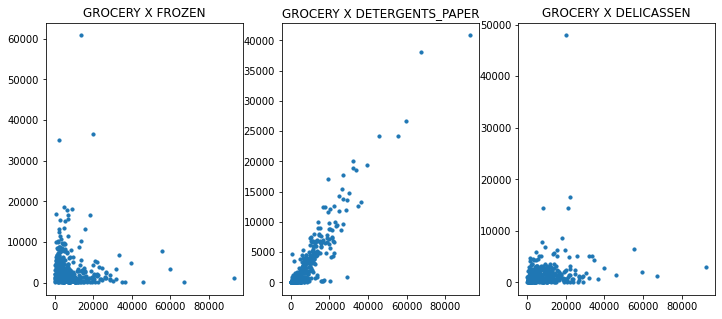

In [ ]:
plt.figure(figsize=(12,5))

plt.subplot(1, 3, 1) 
plt.scatter(sale.loc[:,'Grocery'], sale.loc[:,'Frozen'],s=10)
plt.title('Grocery x Frozen'.upper(), fontsize=12) 

plt.subplot(1, 3, 2) 
plt.scatter(sale.loc[:,'Grocery'], sale.loc[:,'Detergents_Paper'],s=10)
plt.title('Grocery x Detergents_Paper'.upper(), fontsize=12)

plt.subplot(1, 3, 3) 
plt.scatter(sale.loc[:,'Grocery'], sale.loc[:,'Delicassen'],s=10)
plt.title('Grocery x Delicassen'.upper(), fontsize=12)

Temos uma grande relação entre GROCERY e DETERGENTS_PAPER

Text(0.5, 1.0, 'FROZEN X DELICASSEN')

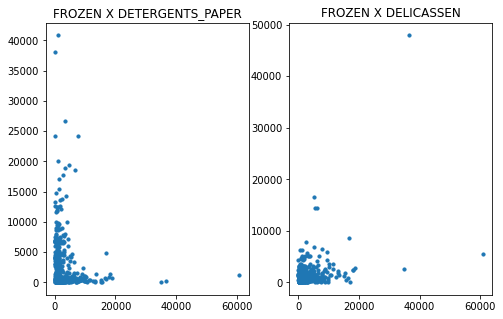

In [ ]:
plt.figure(figsize=(8,5))

plt.subplot(1, 2, 1)
plt.scatter(sale.loc[:,'Frozen'], sale.loc[:,'Detergents_Paper'],s=10)
plt.title('Frozen x Detergents_Paper'.upper(), fontsize=12)

plt.subplot(1, 2, 2) 
plt.scatter(sale.loc[:,'Frozen'], sale.loc[:,'Delicassen'],s=10)
plt.title('Frozen x Delicassen'.upper(), fontsize=12)

Aqui pouca relação também, um pouquinho entre FROZEM e DELICASSEN

Text(0.5, 1.0, 'DETERGENTS_PAPER X DELICASSEN')

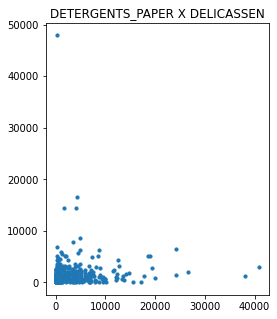

In [ ]:
plt.figure(figsize=(4,5)) 
plt.scatter(sale.loc[:,'Detergents_Paper'], sale.loc[:,'Delicassen'],s=10)
plt.title('Detergents_Paper x Delicassen'.upper(), fontsize=12)

E por último uma baixa relação também

- Estas comparações e estes gráficos nos ajudaram a entender quais variáveis poderíamos utilizar na criação do nosso modelo, tentamos, olhando para os gráficos, encontrar as variáveis que tem mais relação. No caso achamos melhor trabalhar com "MILK", "GROCERY" e "DETERGENTS_PAPER". 
- Para efeito de aprendizagem foram feitos testes de agrupamento, com o método Kmedias, somente com estas 3 variáveis, porém o resultado não foi satisfatório e foi preferível continuar com o dataset original por enquanto.

**Trabalhando com outliers** 
- Vamos aplicar a retirada dos outliers das 3 variáveis que tinhamos selecionado anteriormente, "MILK", "GROCERY" e "DETERGENTS_PAPER".
- Para a retirada dos outliers vamos utilizar o método do desvio padrão, no nosso caso vamos retirar os valores que sejam maiores que a média somados com o desvio padrão multiplicado por 3.
- Utilizamos a multiplicação 3 pelo fato de que não queremos retirar muitos valores, temos um conjunto pequeno de dados para treinar o modelo.

In [ ]:
def outlier(X,colum):

  desvp = X[colum].std()
  media = X[colum].mean()

  print("Media = %.2f, Desvio padrao = %.2f" % (media, desvp))

  # apenas outliers segundo std
  dataout_std = X[(X[colum] < media - (desvp*3)) | (X[colum] > media + (desvp*3))]
  print("Outliers:", len(dataout_std))

  # apenas inliers segundo std
  dc_std = X[(X[colum] >= media - (desvp*3)) & (X[colum] <= media + (desvp*3))]
  print("Inliers:", len(dc_std))

  plt.figure(figsize=(12,4))
  plt.subplot(131); X.boxplot([colum]); plt.title('Original')
  plt.subplot(132); dataout_std.boxplot([colum]); plt.title('Sem Outliers')
  plt.subplot(133); dc_std.boxplot([colum]); plt.title('Nova Análise')
  plt.show()


Media = 5796.27, Desvio padrao = 7380.38
Outliers: 9
Inliers: 431


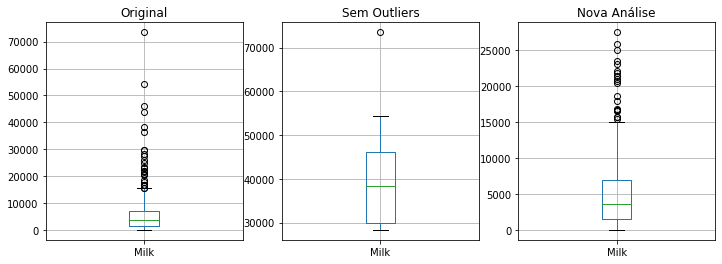

In [ ]:
outlier(sale,"Milk")

In [ ]:
sale[sale['Milk'] > (sale['Milk'].mean() + sale['Milk'].std()*4)]

# foi comentada esta parte porque preferimos seguir o trabalho com todos os dados, também por ser um conjunto de dados pequeno
#sale = sale.drop([23,47,61,85,86,183],axis=0)

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
23,2,3,26373,36423,22019,5154,4337,16523
47,2,3,44466,54259,55571,7782,24171,6465
61,2,3,35942,38369,59598,3254,26701,2017
85,2,3,16117,46197,92780,1026,40827,2944
86,2,3,22925,73498,32114,987,20070,903
183,1,3,36847,43950,20170,36534,239,47943


Media = 7951.28, Desvio padrao = 9503.16
Outliers: 7
Inliers: 433


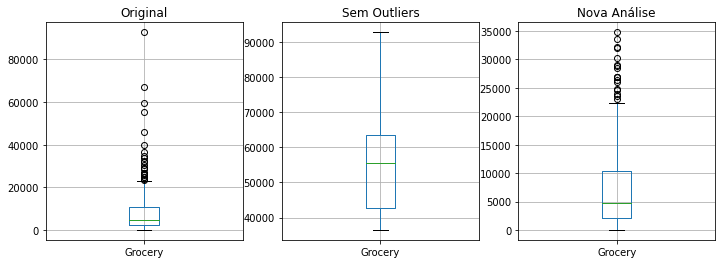

In [ ]:
outlier(sale,"Grocery")

In [ ]:
sale[sale["Grocery"] > (sale["Grocery"].mean() + sale["Grocery"].std()*4)]
#sale = sale.drop([333],axis=0)

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
47,2,3,44466,54259,55571,7782,24171,6465
61,2,3,35942,38369,59598,3254,26701,2017
85,2,3,16117,46197,92780,1026,40827,2944
333,2,2,8565,4980,67298,131,38102,1215


Media = 2881.49, Desvio padrao = 4767.85
Outliers: 10
Inliers: 430


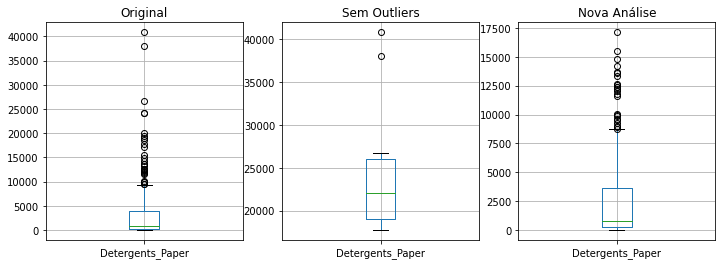

In [ ]:
outlier(sale,'Detergents_Paper')

In [ ]:
sale[sale['Detergents_Paper'] > (sale['Detergents_Paper'].mean() + sale['Detergents_Paper'].std()*4)]
#sale = sale.drop([65],axis=0)

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
47,2,3,44466,54259,55571,7782,24171,6465
61,2,3,35942,38369,59598,3254,26701,2017
65,2,3,85,20959,45828,36,24231,1423
85,2,3,16117,46197,92780,1026,40827,2944
333,2,2,8565,4980,67298,131,38102,1215


Como visto no código não foi aplicada a retirada dos outliers para a continuação do trabalho, assim como antes vamos utilizar este passo apenas como aprendizado. Foi testado o modelo com estes outliers retirados, mas também não foram encontrados melhores resultados.

Seguindo com projeto, agora vamos para outra análise, vamos transformar as variáveis CHANNEL e REGION em números binários, onde criaremos colunas para cada característica, neste caso representados por números, assim, quando o cliente pertencer a determinado grupo será sinalizado com o número 1, caso não, número 0. Segue código abaixo, este também conhecidos como dummy, porém, neste caso fiz manualmente.

In [ ]:
X['Horeca'] = X['Channel'] 
X['Varejo'] = X['Channel']  

X['Horeca'] = X['Horeca'].map({1:1,2:0})
X['Varejo'] = X['Varejo'].map({1:0,2:1}) 

In [ ]:
X['R_Lisbon'] = X['Region'] 
X['R_Oporto'] = X['Region'] 
X['R_Other'] = X['Region'] 

X['R_Lisbon'] = X['R_Lisbon'].map({1:1,2:0,3:0}) 
X['R_Oporto'] = X['R_Oporto'].map({1:0,2:1,3:0}) 
X['R_Other'] = X['R_Other'].map({1:0,2:0,3:1}) 

Tirando as variáveis "Channel" e "Region", poise elas foram para o final da tabela em outro formato

In [ ]:
X = X.drop(["Channel","Region"], axis=1)

Aqui podemos visualizar como ficou o nosso conjunto de dados depois da formatação:

In [ ]:
X

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Horeca,Varejo,R_Lisbon,R_Oporto,R_Other
0,12669,9656,7561,214,2674,1338,0,1,0,0,1
1,7057,9810,9568,1762,3293,1776,0,1,0,0,1
2,6353,8808,7684,2405,3516,7844,0,1,0,0,1
3,13265,1196,4221,6404,507,1788,1,0,0,0,1
4,22615,5410,7198,3915,1777,5185,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
435,29703,12051,16027,13135,182,2204,1,0,0,0,1
436,39228,1431,764,4510,93,2346,1,0,0,0,1
437,14531,15488,30243,437,14841,1867,0,1,0,0,1
438,10290,1981,2232,1038,168,2125,1,0,0,0,1


# Exercicio 1. (3.0 pontos)

Faça um gráfico de cotovelo, quantos clusters aproximadamente melhor separam este conjunto de dados informado pelo grafico de cotovelo?

Vamos utilizar somente os dados de X

In [ ]:
#normalizando os dados de X
X = StandardScaler().fit_transform(X) 

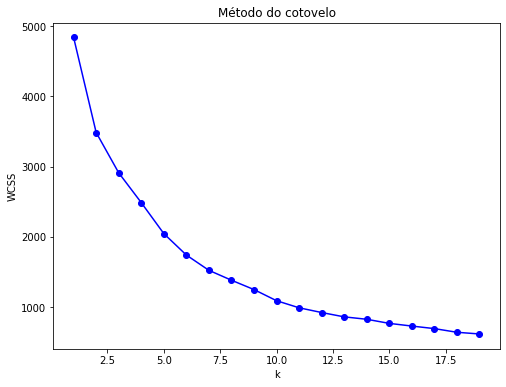

In [ ]:
#### VALE 0.5 pontos
#### CONSTRUA OS SEUS GRAFICOS ABAIXO, USE MAIS CELULAS SE NECESSARIO

WCSS = []

K = range(1,20)
for k in K:
  kmeans = KMeans(n_clusters=k)
  kmeans.fit(X)
  WCSS.append(kmeans.inertia_)

plt.figure(figsize=(8,6))
plt.plot(K , WCSS, '-bo')
plt.xlabel('k')
plt.ylabel("WCSS")
plt.title('Método do cotovelo')
plt.show()

**RESPOSTA** (VALE 1.0 ponto): 
- É bem complicado na verdade concluir algo através deste método, quando a curva fica muito suave, nestes casos temos que tentar por outras métricas.
- Olhando para o gráfico acredito que deveríamos testar os K entre 2 e 6, é o momento em que o nosso gráfico de cotovelo deixa, levemente, de ficar na vertical para ficar mais na horizontal, logo vamos testar com outra métrica e verificar qual K se encaixa melhor, utilizando a métrica da silhouette.


Construa um modelo de **clusterização K-Médias** usando o melhor numero de clusters informado pelo gráfico de cotovelo e usem o parametro **random_state** com valor 10.

In [ ]:
#### VALE 0.5 pontos
#### EXECUTE OS COMANDOS ABAIXO, USE MAIS CELULAS SE NECESSARIO

kmedia2 = KMeans(n_clusters=2, random_state = 10)
kmedia2_pred = kmedia2.fit_predict(X)

kmedia3 = KMeans(n_clusters=3, random_state = 10)
kmedia3_pred = kmedia3.fit_predict(X)

kmedia4 = KMeans(n_clusters=4, random_state = 10)
kmedia4_pred = kmedia4.fit_predict(X)

kmedia5 = KMeans(n_clusters=5, random_state = 10)
kmedia5_pred = kmedia5.fit_predict(X)

kmedia6 = KMeans(n_clusters=6, random_state = 10)
kmedia6_pred = kmedia5.fit_predict(X)

In [ ]:
print('k-médias com k=2')
print('Silhouette Score(euclidean):' , silhouette_score(X, kmedia2_pred, metric = 'euclidean'))

print('\nk-médias com k=3')
print('Silhouette Score(euclidean):' , silhouette_score(X, kmedia3_pred, metric = 'euclidean'))


print('\nk-médias com k=4')
print('Silhouette Score(euclidean):' , silhouette_score(X, kmedia4_pred, metric = 'euclidean'))

print('\nk-médias com k=5')
print('Silhouette Score(euclidean):' , silhouette_score(X, kmedia5_pred, metric = 'euclidean'))

print('\nk-médias com k=6')
print('Silhouette Score(euclidean):' , silhouette_score(X, kmedia6_pred, metric = 'euclidean'))

k-médias com k=2
Silhouette Score(euclidean): 0.3822985274279436

k-médias com k=3
Silhouette Score(euclidean): 0.39249570468378986

k-médias com k=4
Silhouette Score(euclidean): 0.4161858820048841

k-médias com k=5
Silhouette Score(euclidean): 0.4706106938290524

k-médias com k=6
Silhouette Score(euclidean): 0.4706106938290524


Como não foi possível ter certeza do valor do K com gráfico de cotovelo, utilizamos a métrica silhouette para encontrar o melhor valor, neste caso foram encontrados os valores 5 e 6, porem como o 5 gasta menos processamento, optamos pelo menor k, k = 5

Adicione o resultado da clusterização no conjunto de dados original, chame essa nova variavel de **cluster** e conte quantas observações há em cada cluster e preencha:
- Vamos utilizar o K = 5

In [ ]:
#### VALE 0.5 pontos
#### EXECUTE OS COMANDOS ABAIXO, USE MAIS CELULAS SE NECESSARIO

sale['cluster5'] = kmedia5_pred

In [ ]:
sale

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,cluster5
0,2,3,12669,9656,7561,214,2674,1338,2
1,2,3,7057,9810,9568,1762,3293,1776,2
2,2,3,6353,8808,7684,2405,3516,7844,2
3,1,3,13265,1196,4221,6404,507,1788,1
4,2,3,22615,5410,7198,3915,1777,5185,2
...,...,...,...,...,...,...,...,...,...
435,1,3,29703,12051,16027,13135,182,2204,1
436,1,3,39228,1431,764,4510,93,2346,1
437,2,3,14531,15488,30243,437,14841,1867,2
438,1,3,10290,1981,2232,1038,168,2125,1


In [ ]:
sale['cluster5'].value_counts()

1    209
2    107
0     65
4     46
3     13
Name: cluster5, dtype: int64

In [ ]:
cluster_1 = (sale['cluster5'].value_counts())[0]   # valor 0 na tabela
cluster_2 = (sale['cluster5'].value_counts())[1]   # valor 1 na tabela
cluster_3 = (sale['cluster5'].value_counts())[2]   # valor 2 na tabela
cluster_4 = (sale['cluster5'].value_counts())[3]   # valor 3 na tabela
cluster_5 = (sale['cluster5'].value_counts())[4]   # valor 4 na tabela

In [ ]:
#### VALE 0.5 pontos
# Substitua __ pelos valores solicitados
print('Total de observações do cluster 1: {}'.format(cluster_1))
print('Total de observações do cluster 2: {}'.format(cluster_2))
print('Total de observações do cluster 3: {}'.format(cluster_3))
print('Total de observações do cluster 4: {}'.format(cluster_4))
print('Total de observações do cluster 5: {}'.format(cluster_5))
# copie a linha de cima, alterando o cluster e preenchendo o total

Total de observações do cluster 1: 65
Total de observações do cluster 2: 209
Total de observações do cluster 3: 107
Total de observações do cluster 4: 13
Total de observações do cluster 5: 46


# Exercicio 2. (4.0 pontos)

Escolha dois clusters e separe os dados em dois subconjuntos, chamando-os de clusterA e clusterB.

In [ ]:
#### VALE 1.0 ponto
#### EXECUTE OS COMANDOS ABAIXO, USE MAIS CELULAS SE NECESSARIO

clusterA = sale[sale['cluster5'] == 0]
clusterB = sale[sale['cluster5'] == 4]

Utilizaremos a função **.describe()** para obtermos as medidas de média, desvio padrão, valor minimo e valor máximo dos subconjuntos clusterA e clusterB

In [ ]:
#### VALE 1.0 ponto
#### EXECUTE O COMANDO ABAIXO PARA clusterA

clusterA.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,cluster5
count,65.000000,65.0,65.000000,65.000000,65.000000,65.000000,65.000000,65.000000,65.0
mean,1.092308,1.0,12357.030769,4017.907692,4391.969231,3156.769231,1168.907692,1200.938462,0.0
std,0.291712,0.0,12061.962167,4143.922854,3718.565676,3227.185111,1550.658960,1177.613873,0.0
min,1.000000,1.0,514.000000,258.000000,489.000000,91.000000,5.000000,7.000000,0.0
25%,1.000000,1.0,3317.000000,1115.000000,1777.000000,982.000000,244.000000,375.000000,0.0
50%,1.000000,1.0,8635.000000,2567.000000,2914.000000,1859.000000,430.000000,791.000000,0.0
75%,1.000000,1.0,18044.000000,5279.000000,5838.000000,4634.000000,967.000000,1553.000000,0.0
max,2.000000,1.0,56083.000000,23527.000000,16966.000000,18711.000000,5957.000000,6854.000000,0.0


In [ ]:
#### VALE 1.0 ponto
#### EXECUTE O COMANDO ABAIXO PARA clusterB

clusterB.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,cluster5
count,46.000000,46.0,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000,46.0
mean,1.391304,2.0,9916.434783,5090.521739,7956.000000,4130.456522,2939.326087,1158.500000,4.0
std,0.493435,0.0,8478.243698,5890.702032,6602.100316,9234.094315,4061.209908,1062.317901,0.0
min,1.000000,2.0,3.000000,333.000000,1330.000000,264.000000,15.000000,51.000000,4.0
25%,1.000000,2.0,2684.250000,1402.750000,2767.750000,843.500000,278.750000,535.750000,4.0
50%,1.000000,2.0,7839.000000,2354.500000,5723.000000,1460.000000,760.500000,883.000000,4.0
75%,2.000000,2.0,15403.250000,6007.750000,11392.250000,3385.000000,4060.500000,1540.750000,4.0
max,2.000000,2.0,32717.000000,25071.000000,26839.000000,60869.000000,17120.000000,5609.000000,4.0


Comparando as médias, valores minimos e máximos obtidos, há diferença entre o subconjunto clusterA e clusterB?

In [ ]:
def boxplot_cluster(colunas_cluster):
  plt.figure(figsize=(12,4))
  plt.subplot(131); clusterA.boxplot([colunas_cluster]); plt.title('ClusterA')
  plt.subplot(132); clusterB.boxplot([colunas_cluster]); plt.title('ClusterB')
  # plt.subplot(133); dc_std.boxplot([colum]); plt.title('Nova Análise')
  plt.show()


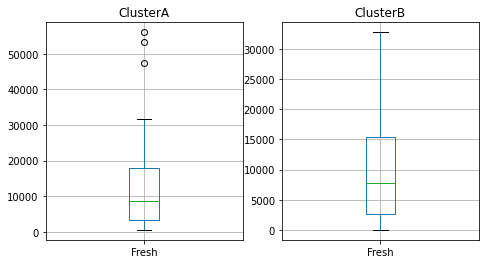

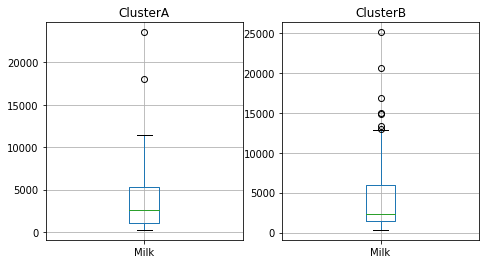

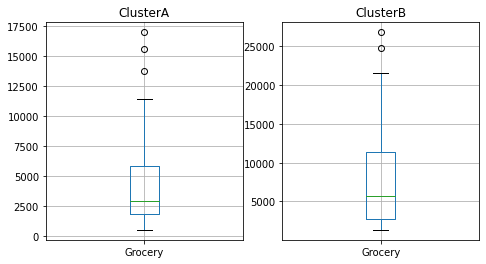

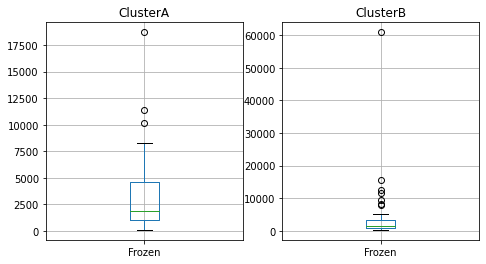

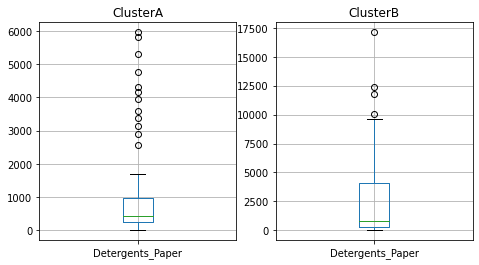

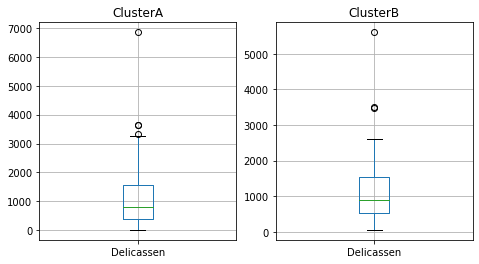

In [ ]:
colunas_cluster = "Fresh"
boxplot_cluster(colunas_cluster)
colunas_cluster = "Milk"
boxplot_cluster(colunas_cluster)
colunas_cluster = "Grocery"
boxplot_cluster(colunas_cluster)
colunas_cluster = "Frozen"
boxplot_cluster(colunas_cluster)
colunas_cluster = "Detergents_Paper"
boxplot_cluster(colunas_cluster)
colunas_cluster = "Delicassen"
boxplot_cluster(colunas_cluster)

**RESPOSTA** (VALE 0.5 pontos): 
- Primeiramente foi possível ver que nos dois grupos a maioria dos clientes são de origem de hotel, restaurante ou café. Logo na segunda coluna podemos perceber que todos os clientes do cluster A são da região de Lisboa e todos os clientes do cluster B são da região do porto, logo este é, com certeza, o ponto em comum dos clusters.
- Podemos ver também que os valores dos clusters não são nada parecidos, em alguns momentos a média é bem mais alta do cluster A e em outros é o cluster B que tem as maiores médias. Isso fica mais visivel ainda com a ajuda dos gráficos de boxplot.


Sendo dois agrupamentos distintos, qual rotulo poderiamos utilizar para identifica-los? Justifique a sua resposta

**RESPOSTA** (VALE 0.5 pontos): Neste caso aqui, com toda certeza podemos utilizar a região para identifica-los. Para o ClusterA identificamos como os clientes sendo proveniêntes da região de Lisboa, e para o ClusterB identificamos os cliêntes sendo da região do Oporto.

# Exercicio 3. (3 pontos)

Responda, quais são as vantagens e desvantagens do algoritmo K-Médias?

**RESPOSTA** (VALE 1.0 ponto):
- Tem o poder de classificação por grupos, podendo escolher o número de grupos(k)
- É fácil de implementar
- utiliza a distância para entre as variáveis para caracterizar os grupos.
- Se adapta fácilmente a diferentes grupos e grandes conjuntos de dados.
- X
- É muito sensivel a outliers, um valor muito deslocado pode alterar a média das distancias muito facilmente
- Dependendo do número de dimensões fica dificil de se replicar o modelo.

Quantos elementos há em cada clusters se o numero de clusters for igual ao total de observações?

**RESPOSTA** (VALE 1.0 ponto): um, se o número de clusters for igual ao total das observações, teremos um cluster para cada elemento.

Se o parametro **k** for igual a 1, quantos clusters teremos e quantos elementos há em cada cluster?

**RESPOSTA** (VALE 1.0 ponto): Se tivermos somente um k, teremos somente um grupo e o total de elementos será o total do conjunto de dados.

A inicialização dos centroides afeta o algoritmo K-Médias?


RESPOSTA (VALE 1.0 ponto): Com toda a certeza afeta, dependendo de onde for inicializado os centroides o modelo pode demadar mais energia para chegar ao ponto ideal e muitas vezes nem chegar. A resposta pode variar de acordo com a inicialização dos centróides.